In [1]:
import numpy as np
import sys
import os
import fnmatch
sys.path.append('../')
import base as base
import path_analysis
import matplotlib.pyplot as plt
import pandas as pd
import datetime
processed= 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/processed/straightness/'

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## The purpose of thios notebook is to explore Jin's code with open base and path analyais and eventually be abel to plot and 
perphaps first export the straigntess analysis - here again the idea is to analyze the striaghtness before the beacon - about 5 seconds and compare it to sham. 
So there shou be for each animal perhaps for each 5 seconds before beacon some numbers can then compare them to across sessipns. 
Should have a plot simliar to the rearing - But here it is Instantenous straightness 

### 1. Load one session
2. Plot trajectory for one trial/ beacon 
3. calculate straightness for time before the beacon 
4. plot the straightness 5 seconds back
5. Seperate for visible and invisibel beacon - use meatdata 
6. Repeat for more then 2 sessions 
7. Run averages for perhaps 10 sessions each 
8. calculate bootstrapped 

# 1. Load one session 

In [2]:
root = '//10.153.170.3/storage2/fabian/data/project/FS11/Training/BPositions_FS11_20211006-161633'
tag = '20211006-161633'

In [3]:
FS11_one = base.BeaconPosition(root, tag, has_beacon = True, has_metadata = True, )

..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


In [4]:
FS11_one.metadata



,Recording started on,Computer time was,ITI_time,time_in_cylinder,movement_collection_time,animal_ID,background_color,circle,position_change,light_off,...,recording lenght,high pellets,high_time_in_cylinder,invisible_time,invisible_count,invisible_list,Animal jumped,Recording_started_motive,Recording_timestamp_motive,Day
1,2021-10-06 16:16:33,1633529793.16,1.5,1.5,0.01,FS11,000,0.075,1000,200,...,1833.10300016,18,0.5,60,0,[],0,0,0.0,156


## Show one trial with beacon

[-0.15904586 -0.52945693]


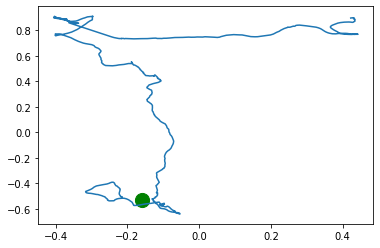

In [5]:
plt.plot(FS11_one.trial_list[2][2000:-1,1],FS11_one.trial_list[2][2000:-1,2] )
print(FS11_one.trial_beacon[2])
plt.scatter(FS11_one.trial_beacon[2][0],FS11_one.trial_beacon[2][1],c="green",s=200)

## Print when session started and compare to when first trial if marked - started in metadata when pressed start - so not when animal lowered in

In [6]:
time = FS11_one.metadata["Computer time was"]
lasted = float(FS11_one.metadata["recording lenght"][1])
print (float(time[1]))
print(datetime.datetime.fromtimestamp(float(time[1])).strftime('%c'))
print(datetime.datetime.fromtimestamp(lasted + float(time[1])).strftime('%c'))


1633529793.16
Wed Oct  6 16:16:33 2021
Wed Oct  6 16:47:06 2021


## Print first and last time from the segmented trials 

In [7]:
time = FS11_one.trial_list[0][:,:1][0]
last =  FS11_one.trial_list[-1][:,:1][-1]
print(print(datetime.datetime.fromtimestamp(time[0]).strftime('%c')))
print(print(datetime.datetime.fromtimestamp(last[0]).strftime('%c')))

Wed Oct  6 16:16:39 2021
None
Wed Oct  6 16:47:04 2021
None


## Begginign of the first trial is likley the entry of the rat inside of arena - hence need to measure straightness from the last time of the trial 

In [8]:
straightness_time = path_analysis.straightness_over_time(FS11_one.trial_list[2][-300:-1,:3], time_window=4)
straightness_time2 = path_analysis.straightness_over_time(FS11_one.trial_list[2][:,:3], time_window=4)

In [9]:
straightness_time[2][:,1]

array([-0.50612768, -0.50640712, -0.50651683, -0.50608623, -0.50538936,
       -0.50432054, -0.50297331, -0.50073962, -0.49914425, -0.49728039,
       -0.49465245, -0.49111357, -0.48283658, -0.47861955, -0.47464424,
       -0.47075503, -0.46738701, -0.45990444, -0.45546589, -0.45101476,
       -0.44696259, -0.44446514, -0.43984926, -0.43773752, -0.43515358,
       -0.43384142, -0.42625259, -0.42253699, -0.42052025, -0.41914127,
       -0.41851685, -0.4140538 , -0.40999833, -0.40552383, -0.39998133,
       -0.3976012 , -0.39612645, -0.39455957, -0.39106775, -0.3901478 ,
       -0.39060537, -0.39241122, -0.39512733, -0.39875792, -0.40422163,
       -0.40678511, -0.40932091, -0.4128928 , -0.41880166, -0.42144869,
       -0.42441892, -0.42712972, -0.42994045, -0.43634966, -0.4399827 ,
       -0.44331796, -0.44690192, -0.45130735, -0.45938252, -0.46178839,
       -0.46368478, -0.46625704, -0.47183526, -0.47441951, -0.47654061,
       -0.47758608, -0.47969204, -0.48166475, -0.48566539, -0.48

[-0.15904586 -0.52945693]


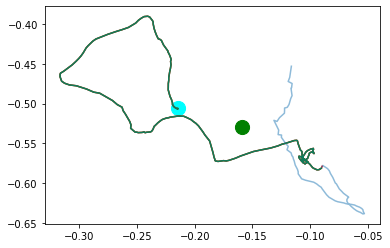

In [10]:
plt.plot(straightness_time[2][:,0],straightness_time[2][0:,1],c="red")
plt.plot(straightness_time2[2][:,0],straightness_time2[2][0:,1],c="green")
plt.plot(FS11_one.trial_list[2][-300:-1,1],FS11_one.trial_list[2][-300:-1,2],alpha= .5)
print(FS11_one.trial_beacon[2])
plt.scatter(FS11_one.trial_beacon[2][0],FS11_one.trial_beacon[2][1],c="green",s=200)
plt.scatter(FS11_one.trial_list[2][-2:-1,1],FS11_one.trial_list[2][-2:-1,2],c="cyan",s= 200)


# Above - showing that if I measure the last 300 samples and their straightness, it will be till the end of the trial - becasue I plot the postions from the straighntess_time - Hence I can use the straigthness measure as it counts it back wards for the beacno and I just need to flip the the axis at the end. 

### Problem is that trial segmentation is done only as invisible succesful visible or invisible succesfull. - But I anyways need to index only to either 0 - visible or 2 invisible succesful  

Wed Oct  6 16:20:32 2021
None


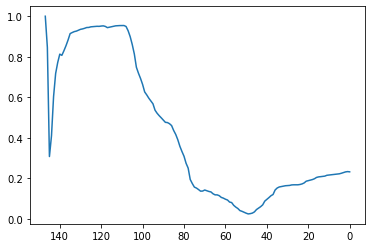

In [11]:
straightness_time = path_analysis.straightness_over_time(FS11_one.trial_list[2][:,:3], time_window=3)
time = FS11_one.trial_list[2][:,:1][0]
print(print(datetime.datetime.fromtimestamp(time[0]).strftime('%c')))
plt.plot(straightness_time[0], )
plt.gca().invert_xaxis()

# Now show all straightness from the last 4 seconds in all trials int he first session 

# trial_visible: list of booleans referring visibility of trial (0 - visible, 1 - successful invisible, 2 - failed invisible )

## Now plot with averages as well 

In [13]:
print(FS11_one.trial_list[23][:,:3])

[[ 1.63353147e+09 -2.12824310e-01 -5.09826481e-01]
 [ 1.63353147e+09 -2.14724449e-01 -5.10332945e-01]
 [ 1.63353147e+09 -2.18789118e-01 -5.11721089e-01]
 ...
 [ 1.63353162e+09 -2.75770481e-01  7.61994083e-01]
 [ 1.63353162e+09 -2.76896666e-01  7.64063617e-01]
 [ 1.63353162e+09 -2.76896666e-01  7.64063617e-01]]


..\path_analysis.py:89: RuntimeWarning: invalid value encountered in double_scalars
  straightness.append(straight_length / trajectory_displacement)
..\path_analysis.py:89: RuntimeWarning: invalid value encountered in double_scalars
  straightness.append(straight_length / trajectory_displacement)
<ipython-input-15-81bdab5df5e3>:23: RuntimeWarning: Mean of empty slice
  average_invis = np.nanmean(invisible,axis=1)


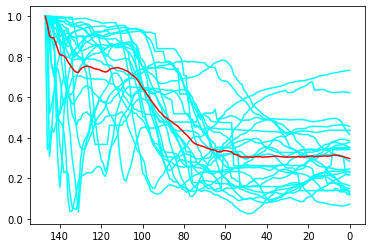

In [15]:
trial_num = len(FS11_one.trial_list[:])
visible=np.nan*np.ones((len(straightness_time[0]),trial_num))
invisible=np.nan*np.ones((len(straightness_time[0]),trial_num))
for i in range(len(FS11_one.trial_list)):
    straightness_time = path_analysis.straightness_over_time(FS11_one.trial_list[i][:,:3], time_window=3)
    
#     print(trial_num)

#     print(visible )
#     invisible=np.array([])
    if FS11_one.trial_visible[i]:
        print(FS11_one.trial_visible[1])
        plt.plot(straightness_time[0])
        invisible[:len(straightness_time[0]),i]=straightness_time[0]
#         plt.gca().invert_xaxis()
    else:
        plt.plot(straightness_time[0],c='cyan')
#         plt.gca().invert_xaxis()
#         print(straightness_time[0])
        visible[:len(straightness_time[0]),i]=straightness_time[0]
#         np.concatenate(visible,np.array(straightness_time[0]) )
average_vis = np.nanmean(visible,axis=1)
average_invis = np.nanmean(invisible,axis=1)
plt.plot(average_vis,c='red')
plt.plot(average_invis,c='black')
plt.gca().invert_xaxis()
#     vis = np.average(visible,axis=0)
#     invis = np.average(invisible,axis=0)

# 2. Load more then 1 session

In [16]:
def Make_tags (rat_ID="FS11"):
    """Takes in animal ID and searches through a specific subfolder in storage 2 to generate time tags for each session
    
    PARAMS
    ------------
    rat_ID : str
        name of animal
    
    Returns
    ------------
    list of str of roots and list of str of tags - date time   
    
    """
    animal= '//10.153.170.3/storage2/fabian/data/project/'+rat_ID 
    dirnames = [ name for name in os.listdir(animal) if os.path.isdir(os.path.join(animal, name)) ]   
    roots = [k for k in dirnames if 'BP' in k]
    filter_tags = [x[-15:] for x in roots]
    filter_roots = [animal + s for s in roots]
    return filter_roots, filter_tags, 
root, tags = Make_tags ("FS11/Training/")

In [19]:
np.size(root)
print(root[0:5])
print(tags[0:5])
print(len(root))


['//10.153.170.3/storage2/fabian/data/project/FS11/Training/BPositions_FS11_20211006-161633', '//10.153.170.3/storage2/fabian/data/project/FS11/Training/BPositions_FS11_20211007-142813', '//10.153.170.3/storage2/fabian/data/project/FS11/Training/BPositions_FS11_20211011-102330', '//10.153.170.3/storage2/fabian/data/project/FS11/Training/BPositions_FS11_20211014-163731', '//10.153.170.3/storage2/fabian/data/project/FS11/Training/BPositions_FS11_20211015-175713']
['20211006-161633', '20211007-142813', '20211011-102330', '20211014-163731', '20211015-175713']
88


In [18]:
FS11 = base.MultiDaysBeaconPosition(root[0:5], tags[0:5], has_beacon = True, has_metadata= True)

20211006-161633


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20211007-142813


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20211011-102330


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20211014-163731


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20211015-175713


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


In [20]:
FS11.dataset_list[1].beacon_data

array([[ 1.63361003e+09, -1.59045861e-01, -5.29456926e-01],
       [ 1.63361032e+09, -1.59045861e-01, -5.29456926e-01],
       [ 1.63361038e+09, -2.48865120e-01,  7.34667226e-01],
       [ 1.63361046e+09, -2.48865120e-01,  7.34667226e-01],
       [ 1.63361049e+09, -2.52951041e-01, -2.55863060e-02],
       [ 1.63361056e+09, -2.52951041e-01, -2.55863060e-02],
       [ 1.63361061e+09,  1.99776237e-01, -4.28890912e-01],
       [ 1.63361063e+09,  1.99776237e-01, -4.28890912e-01],
       [ 1.63361072e+09, -1.34980767e-01,  4.15106102e-01],
       [ 1.63361094e+09, -1.34980767e-01,  4.15106102e-01],
       [ 1.63361096e+09,  2.92020227e-01, -7.03357002e-01],
       [ 1.63361103e+09,  2.92020227e-01, -7.03357002e-01],
       [ 1.63361123e+09, -9.92367795e-02, -3.62636841e-01]])

In [21]:
FS11.dataset_list[1].displacement

array([0.00751276, 0.00375954, 0.00610914, ..., 0.00032921, 0.00017164,
       0.00035288])

In [22]:
FS11.dataset_list[1].trial_beacon

array([[-0.15904586, -0.52945693],
       [-0.15904586, -0.52945693],
       [-0.24886512,  0.73466723],
       [-0.24886512,  0.73466723],
       [-0.25295104, -0.02558631],
       [-0.25295104, -0.02558631],
       [ 0.19977624, -0.42889091],
       [ 0.19977624, -0.42889091],
       [-0.13498077,  0.4151061 ],
       [-0.13498077,  0.4151061 ],
       [ 0.29202023, -0.703357  ],
       [ 0.29202023, -0.703357  ],
       [-0.09923678, -0.36263684]])

In [23]:
# Time of the trial 
one = FS11.dataset_list[1].trial_list[0][1][0]
np.shape(FS11.dataset_list[1].trial_list)
my_time=datetime.datetime.fromtimestamp(one).strftime('%c')
my_time

D:\Software\anaconda\envs\project\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


'Thu Oct  7 14:28:37 2021'

In [24]:
FS11.trial_list[1][1][:,:1]


array([[1.63361003e+09],
       [1.63361003e+09],
       [1.63361003e+09],
       ...,
       [1.63361032e+09],
       [1.63361032e+09],
       [1.63361032e+09]])

In [25]:
for time in FS11.trial_list[0][1][:,:3][0:5]:
    print(datetime.datetime.fromtimestamp(time[0]).strftime('%c'))

Wed Oct  6 16:19:23 2021
Wed Oct  6 16:19:23 2021
Wed Oct  6 16:19:23 2021
Wed Oct  6 16:19:23 2021
Wed Oct  6 16:19:23 2021


In [26]:
FS11.trial_list[1][1][:,:3]

array([[ 1.63361003e+09, -9.82588583e-02, -5.18211448e-01],
       [ 1.63361003e+09, -9.76944822e-02, -5.19502553e-01],
       [ 1.63361003e+09, -9.49423459e-02, -5.17282477e-01],
       ...,
       [ 1.63361032e+09, -2.07479088e-01, -5.23433341e-01],
       [ 1.63361032e+09, -2.07479088e-01, -5.23433341e-01],
       [ 1.63361032e+09, -2.07479088e-01, -5.23433341e-01]])

In [27]:
#Looks at straightness only for one moment
#show straightness over the whole time as said 
straightness_time = path_analysis.straightness_over_time(FS11.trial_list[0][1][:,:3], time_window=3)

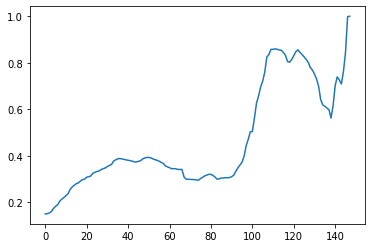

In [28]:
plt.plot(straightness_time[0], )

..\path_analysis.py:89: RuntimeWarning: invalid value encountered in double_scalars
  straightness.append(straight_length / trajectory_displacement)
<ipython-input-72-70a5aa8a473a>:27: RuntimeWarning: Mean of empty slice
  average_vis = np.nanmean(visible,axis=1)
<ipython-input-72-70a5aa8a473a>:29: RuntimeWarning: Mean of empty slice
  average_invis = np.nanmean(invisible,axis=1)
..\path_analysis.py:89: RuntimeWarning: invalid value encountered in double_scalars
  straightness.append(straight_length / trajectory_displacement)
<ipython-input-72-70a5aa8a473a>:27: RuntimeWarning: Mean of empty slice
  average_vis = np.nanmean(visible,axis=1)
<ipython-input-72-70a5aa8a473a>:29: RuntimeWarning: Mean of empty slice
  average_invis = np.nanmean(invisible,axis=1)
..\path_analysis.py:89: RuntimeWarning: invalid value encountered in double_scalars
  straightness.append(straight_length / trajectory_displacement)
<ipython-input-72-70a5aa8a473a>:27: RuntimeWarning: Mean of empty slice
  average_vis

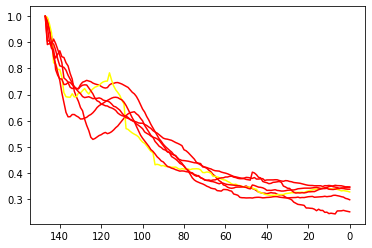

In [72]:
straightness_list_vis = []
straightness_list_invis = []
for k in range (len(FS11.trial_list)):
    trial_num = len(FS11.trial_list[k][:])
    visible=np.nan*np.ones((250,trial_num))
    invisible=np.nan*np.ones((250,trial_num))
    for i in range(len(FS11.trial_list[k])):
#         print(np.shape(FS11.trial_list[k][i][:,:3])[0])
        if np.shape(FS11.trial_list[k][i][:,:3])[0]<150: 
            straightness_time = path_analysis.straightness_over_time(FS11.trial_list[k][i][:,:3], time_window=1)
        else:
            straightness_time = path_analysis.straightness_over_time(FS11.trial_list[k][i][:,:3], time_window=3)
        

        if FS11.trial_visible[k][i]:
#             print(FS11.trial_visible[k][1])
#             plt.plot(straightness_time[0])
            invisible[:len(straightness_time[0]),i]=straightness_time[0]
    #         plt.gca().invert_xaxis()
        else:
#             plt.plot(straightness_time[0],c='cyan')
    #         plt.gca().invert_xaxis()
    #         print(straightness_time[0])
            visible[:len(straightness_time[0]),i]=straightness_time[0]
    #         np.concatenate(visible,np.array(straightness_time[0]) )
#     print(average_vis )
    average_vis = np.nanmean(visible,axis=1)
    straightness_list_vis.append(average_vis)
    average_invis = np.nanmean(invisible,axis=1)
    straightness_list_invis.append(average_invis)
    
    plt.plot(average_vis,c='red')
    plt.plot(average_invis,c='yellow')
    plt.gca().invert_xaxis()
np.save(processed +'%s_straightness_FS11_visible',average_vis)
np.save(processed +'%s_straightness_FS11_invisible',straightness_list_invis)

# Generate and save average per session per animal - might need to seperate due to memory issues. 

# Plot and save per animal 

In [17]:



def plot_safe_per_animal (animal,save):

    root, tags = Make_tags (animal)
    print(len(tags))
    FS11 = base.MultiDaysBeaconPosition(root[0:44], tags[0:44], has_beacon = True, has_metadata= True)
    
    straightness_list_vis = []
    straightness_list_invis = []

    for k in range (len(FS11.trial_list)):
        trial_num = len(FS11.trial_list[k][:])
        visible=np.nan*np.ones((260,trial_num))
        invisible=np.nan*np.ones((260,trial_num))
        for i in range(len(FS11.trial_list[k])):
    #         print(np.shape(FS11.trial_list[k][i][:,:3])[0])
    
            if np.shape(FS11.trial_list[k][i][:,:3])[0]<260: 
                continue
            else:
                straightness_time = path_analysis.straightness_over_time(FS11.trial_list[k][i][:,:3], time_window=5)


            if FS11.trial_visible[k][i]:
    #             print(FS11.trial_visible[k][1])
    #             plt.plot(straightness_time[0])
                invisible[:len(straightness_time[0]),i]=straightness_time[0]
        #         plt.gca().invert_xaxis()
            else:
    #             plt.plot(straightness_time[0],c='cyan')
        #         plt.gca().invert_xaxis()
        #         print(straightness_time[0])
                visible[:len(straightness_time[0]),i]=straightness_time[0]
        #         np.concatenate(visible,np.array(straightness_time[0]) )
    #     print(average_vis )
        average_vis = np.nanmean(visible,axis=1)
        straightness_list_vis.append(average_vis)
        average_invis = np.nanmean(invisible,axis=1)
        straightness_list_invis.append(average_invis)

        plt.plot(average_vis,c='red')
        plt.plot(average_invis,c='yellow')
        plt.gca().invert_xaxis()
    np.save(processed +'%s_straightness_visible'%(save) ,straightness_list_vis)
    np.save(processed +'%s_straightness_invisible'%(save),straightness_list_invis)

# plot_safe_per_animal (animal ="FS10/Training/",save= "FS10_training")

In [48]:
FS11_vis= np.load(processed +'FS11_training_straightness_visible.npy')

In [49]:
FS11_vis[1]

array([0.34426755, 0.34410582, 0.34480007, 0.34687839, 0.34660931,
       0.34726421, 0.34821017, 0.34721119, 0.34726076, 0.34616459,
       0.34551213, 0.34349465, 0.34322272, 0.34288164, 0.34120728,
       0.33990354, 0.33799073, 0.33501014, 0.33453604, 0.3320559 ,
       0.33072244, 0.32820157, 0.32636512, 0.3248065 , 0.32203068,
       0.3197445 , 0.31860726, 0.31543931, 0.31367688, 0.31010343,
       0.30789284, 0.30566878, 0.30378933, 0.30226302, 0.29787876,
       0.29573358, 0.29504886, 0.29266986, 0.29224819, 0.28898217,
       0.28819077, 0.28634373, 0.28864004, 0.28858045, 0.28656539,
       0.28540047, 0.2856718 , 0.28541742, 0.28397233, 0.28145325,
       0.28051222, 0.27999302, 0.2796652 , 0.2792708 , 0.27624727,
       0.2867934 , 0.28607028, 0.28517339, 0.28532619, 0.27875053,
       0.27705837, 0.2674283 , 0.26503706, 0.26265367, 0.26873408,
       0.26767383, 0.26401675, 0.25946043, 0.255989  , 0.25160887,
       0.24860159, 0.24677996, 0.24460601, 0.24014025, 0.23695

## FS11 done but only part way - as thewere was a double scalars bug - similiar with FS10 

22
20210112-180433


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201125-185930


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201201-173129


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201202-181328


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201203-214652


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201208-223904


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201209-120834


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201211-175842


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201212-210900


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201213-215429


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201217-171209


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201217-172420


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201218-202333


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201220-174618


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201221-122943


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201221-211412


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201222-144948


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201222-214912


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201223-125151


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201223-205556


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20210111-163449


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


20201127-182125


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T
..\path_analysis.py:89: RuntimeWarning: invalid value encountered in double_scalars
  straightness.append(straight_length / trajectory_displacement)
<ipython-input-17-07f9a373cf47>:35: RuntimeWarning: Mean of empty slice
  average_vis = np.nanmean(visible,axis=1)
<ipython-input-17-07f9a373cf47>:37: RuntimeWarning: Mean of empty slice
  average_invis = np.nanmean(invisible,axis=1)
<ipython-input-17-07f9a373cf47>:35: RuntimeWarning: Mean of empty slice
  average_vis = np.nanmean(visible,axis=1)
<ipython-input-17-07f9a373cf47>:37: RuntimeWarning: Mean of empty slice
  average_invis = np.nanmean(invisible,axis=1)
..\path_analysis.py:89: RuntimeWarning: invalid value encounte

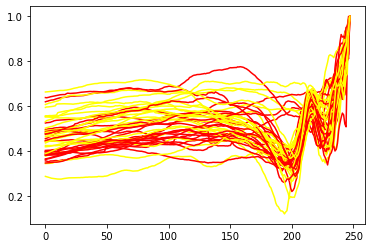

In [20]:
# plot_safe_per_animal (animal ="FS10/Training/",save= "FS10_training")
# plot_safe_per_animal (animal ="FS09/Training/",save= "FS09_training")
# plot_safe_per_animal (animal ="FS08/Training/",save= "FS08_training")

# plot_safe_per_animal (animal ="FS06_new/",save= "FS06_training")
# # plot_safe_per_animal (animal ="FS05",save= "FS05_training") - will need to change offsets 
# plot_safe_per_animal (animal ="FS04_new/",save= "FS04_training")
plot_safe_per_animal (animal ="FS03_new/",save= "FS03_training")


97


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T
..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T
..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T
..\base.py:47: ParserWarning: Falling

66


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T
..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T
..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T
..\base.py:47: ParserWarning: Falling

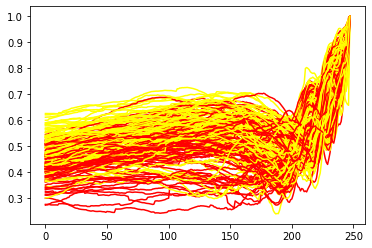

In [44]:
# plot_safe_per_animal (animal ="FS07",save= "FS07_training")
# plot_safe_per_animal (animal ="FS10/Training/",save= "FS10_training")
# plot_safe_per_animal (animal ="FS09/Training/",save= "FS09_training")

# Petrubations : DONE ALL 

In [ ]:
# plot_safe_per_animal (animal ="FS11/Vestibular/",save= "FS11_vestibular")
# plot_safe_per_animal (animal ="FS10/Vestibular/",save= "FS10_vestibular") #- gives error - for trial list 
# plot_safe_per_animal (animal ="FS09/Vestibular/",save= "FS09_vestibular")
# plot_safe_per_animal (animal ="FS08/Vestibular/",save= "FS08_vestibular")

5


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T
..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T
..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T
..\base.py:47: ParserWarning: Falling

3


..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T
..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T
..\base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T
..\path_analysis.py:89: RuntimeWarnin

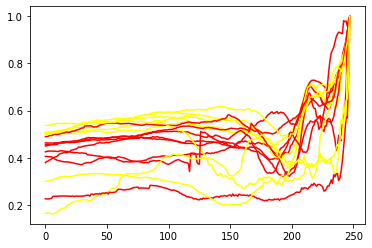

In [30]:
# plot_safe_per_animal (animal ="FS11/Visual/",save= "FS11_visual") #last one had metadata but decided to cut it as it was not stopped porperly
# plot_safe_per_animal (animal ="FS10/Visual/",save= "FS10_visual")
# plot_safe_per_animal (animal ="FS09/Visual/",save= "FS09_visual")
# plot_safe_per_animal (animal ="FS08/Visual/",save= "FS08_visual")

## Current problem is that trials can be very short so need to assign a different lenght for time window in each case. - Solved with trial sizes 

## Now Bootstrapping - DONE - thanks JIN! - not sure if it pick random trajectories or not

In [65]:
bootstrap_sliding_window=path_analysis.bootstrap(FS11.trial_list[0][0], num_sampling=1000, time_window=3, straightness_type = 'sliding')

In [66]:
np.save(processed +'%s_shuffle_10000_straightness',bootstrap_sliding_window)
bootstrap_sliding_window[0]

array([0.54639544, 0.5482668 , 0.55253051, 0.55475175, 0.56060232,
       0.56741141, 0.57250009, 0.57560113, 0.57560113, 0.58539554,
       0.58539554, 0.5879815 , 0.5879815 , 0.59556752, 0.6075322 ,
       0.61159208, 0.61159208, 0.61159208, 0.62979993, 0.65235188,
       0.65988628, 0.662756  , 0.67543559, 0.68860738, 0.700065  ,
       0.700065  , 0.71346358, 0.71346358, 0.7462101 , 0.75831758,
       0.77232968, 0.77232968, 0.77232968, 0.77232968, 0.77232968,
       0.82644013, 0.83264222, 0.83264222, 0.86081832, 0.87595726,
       0.87595726, 0.87595726, 0.87595726, 0.91284516, 0.93401777,
       0.93430763, 0.93430763, 0.93430763, 0.94079716, 0.94064926,
       0.94103149, 0.94254869, 0.9427124 , 0.94232089, 0.94225819,
       0.94261001, 0.94286134, 0.94445272, 0.94542639, 0.94676684,
       0.94828009, 0.94851499, 0.94904664, 0.95021345, 0.9501484 ,
       0.9512624 , 0.95147937, 0.95126755, 0.95091907, 0.95065053,
       0.95198832, 0.95258925, 0.95271922, 0.95277493, 0.95245

In [67]:
average_boot = np.nanmean(bootstrap_sliding_window,axis=0)
average_boot

array([0.55215347, 0.5533236 , 0.55410008, 0.55529184, 0.55637313,
       0.55717018, 0.55828291, 0.55951307, 0.56100279, 0.56211156,
       0.56312804, 0.56466333, 0.56567347, 0.56666343, 0.56776742,
       0.56839811, 0.56906337, 0.57015809, 0.57083227, 0.57140266,
       0.57208179, 0.57258083, 0.57292292, 0.57327316, 0.57415958,
       0.57473732, 0.57508532, 0.57565196, 0.57595624, 0.57672371,
       0.57789259, 0.57843366, 0.57935772, 0.58010669, 0.58133147,
       0.58229672, 0.58259045, 0.58338636, 0.58472746, 0.58569195,
       0.58692045, 0.58774882, 0.58904521, 0.58993699, 0.59106078,
       0.59156656, 0.59319682, 0.59435432, 0.59537737, 0.59653606,
       0.59766433, 0.59893902, 0.59992151, 0.60146303, 0.60276987,
       0.60308714, 0.60468525, 0.60688095, 0.60768825, 0.60907361,
       0.61019129, 0.61156064, 0.61268412, 0.61465075, 0.61585474,
       0.61737028, 0.61854614, 0.62019566, 0.62168874, 0.62371792,
       0.6253574 , 0.62715283, 0.62900747, 0.63156112, 0.63303

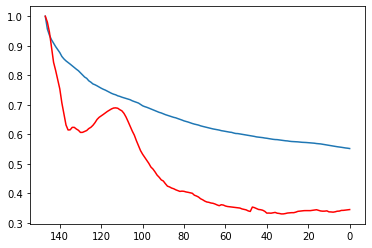

In [68]:

plt.plot(average_boot)
plt.plot(average_vis,c='red')
plt.plot(average_invis,c='yellow')
plt.gca().invert_xaxis()